In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn import model_selection

In [10]:
df_wine = pd.read_csv('wine.csv', header=None)
df_wine.columns = [ 'Class label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
X_train,X_test,y_train, y_test = model_selection.train_test_split(df_wine[df_wine.columns[1:]], df_wine['Class label'], test_size = 0.3, random_state = 0)

In [11]:
feat_labels = df_wine.columns[1:]
forest = ensemble.RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices= np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


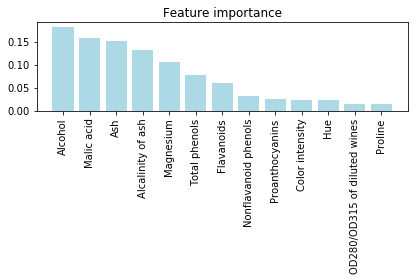

In [12]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()